In [1]:
pwd

'C:\\Users\\Oswin\\Desktop\\Uber'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [48]:
uberdf =pd.read_csv('Uber Request Data.csv')

In [49]:
uberdf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [50]:
uberdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [53]:
#convert the cols to the right format
uberdf['Request timestamp'] = pd.to_datetime(uberdf['Request timestamp'])
uberdf['Drop timestamp'] = pd.to_datetime(uberdf['Drop timestamp'])

In [54]:
uberdf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [55]:
uberdf.groupby(['Status']).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp
Status,,,,,
Cancelled,1264,1264,1264,1264,0
No Cars Available,2650,2650,0,2650,0
Trip Completed,2831,2831,2831,2831,2831


In [ ]:
#from the above we can see there is no missing values and the functionality is real


In [56]:
uberdf.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


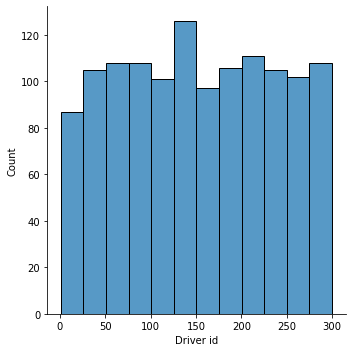

In [60]:
#the drivers canceling rides
sns.displot(uberdf[uberdf['Status']!='Trip Completed']['Driver id'])

In [62]:
#percentage
uberdf.Status.value_counts()*100/uberdf.Status.count()

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

In [ ]:
#Observation
#according to the percentage up, uber does not have enough cars to sustain all the request
#with a 39% of No Cars available

In [63]:
#lets add some more columns for better understanding derived from timestamps
uberdf['r_date'] = uberdf['Request timestamp'].dt.date
uberdf['r_time'] = uberdf['Request timestamp'].dt.time
uberdf['d_date'] = uberdf['Drop timestamp'].dt.date
uberdf['d_time'] = uberdf['Drop timestamp'].dt.time
uberdf['r_hour'] = uberdf['Request timestamp'].dt.hour.astype(int)
day_of_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}
# define bins and labels
bins = ['00:00:00', '03:00:00', '11:00:00','15:00:00', '17:00:00', '23:59:59']
labels = ['Late Night', 'Early Morning', 'Mid-Day','Evening', 'Late Evening']
uberdf['dayofweek'] =uberdf['Request timestamp'].dt.dayofweek.map(day_of_week)
uberdf['timeofday'] = pd.cut(pd.to_timedelta(uberdf['Request timestamp'].dt.time.astype(str)), bins=pd.to_timedelta(bins), labels=labels, ordered=False)

In [67]:
uberdf.head()

,Request id,Pickup point,Driver id,Status,r_date,d_date,r_hour,dayofweek,timeofday
0,619,Airport,1.0,Trip Completed,2016-11-07,2016-11-07,11,Mon,Mid-Day
1,867,Airport,1.0,Trip Completed,2016-11-07,2016-11-07,17,Mon,Late Evening
2,1807,City,1.0,Trip Completed,2016-12-07,2016-12-07,9,Wed,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07,2016-12-07,21,Wed,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13,2016-07-13,8,Wed,Early Morning


In [73]:
uberdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Request id    6745 non-null   int64   
 1   Pickup point  6745 non-null   object  
 2   Driver id     4095 non-null   float64 
 3   Status        6745 non-null   object  
 4   r_date        6745 non-null   object  
 5   d_date        2831 non-null   object  
 6   r_hour        6745 non-null   int32   
 7   dayofweek     6745 non-null   object  
 8   timeofday     6744 non-null   category
dtypes: category(1), float64(1), int32(1), int64(1), object(5)
memory usage: 402.1+ KB


In [74]:
uberdf_new = uberdf[uberdf['Status']!='Trip Completed']

In [75]:
len(uberdf_new)

3914

<AxesSubplot:xlabel='Pickup point'>

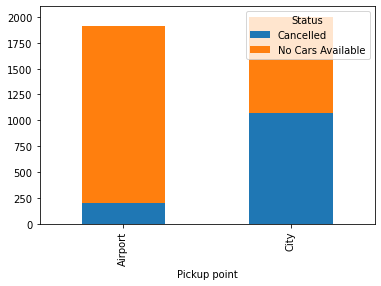

In [77]:
#by pick up points
uberdf_temp = uberdf_new.groupby(['Status','Pickup point']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(uberdf_temp, values ='Pickup point',index=['Pickup point'],columns =['Status']).plot(kind='bar',stacked=True)

In [80]:
#observation
# 1. There is a lot of cancelled rides from the city to the airport
# 2. There is no enough cars from the airport to the city

<AxesSubplot:xlabel='dayofweek'>

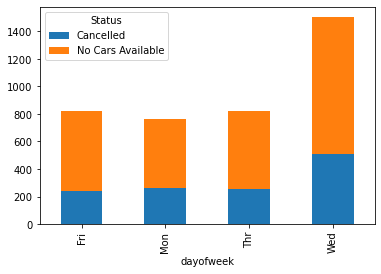

In [79]:
#by dayofweek
uberdf_temp = uberdf_new.groupby(['Status','dayofweek']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(uberdf_temp, values ='dayofweek',index=['dayofweek'],columns =['Status']).plot(kind='bar',stacked=True)


In [ ]:
#observation
#there is more canceled and no rides rides on wednesday 

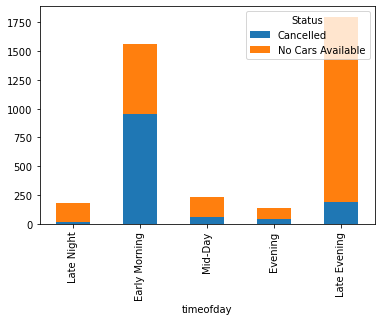

In [81]:
#by timeofday
uberdf_temp = uberdf_new.groupby(['Status','timeofday']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(uberdf_temp, values ='timeofday',index=['timeofday'],columns =['Status']).plot(kind='bar',stacked=True)
plt.show()

In [83]:
#observation
# 1. Early mornings there is more cancelation of trips than cars availability
# 2. There is no rides available late evenings


In [84]:
#Findings
# Most rides are not being completed.
# Rides from airport to city suffers from 'No cars Available'
# As per the provided sample, it seems there is something happening on wednesday. It needs more attention
# Late evenings(5 PM - 12 AM), we have lack of cars available
# Early mornings(3 AM - 11 AM), cancellation is more